In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")
sns.set()
pd.set_option('display.max_columns',None)

In [2]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(1821, 5)


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


##### Image id's corresponding class is given as 1 and rest will 0 (one hot encoded)

In [3]:
train_df.isna().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [5]:
train_df['healthy'].nunique(),train_df['multiple_diseases'].nunique(),train_df['rust'].nunique(),train_df['scab'].nunique()

(2, 2, 2, 2)

In [9]:
train_df['class'] = train_df.iloc[:,1:].idxmax(axis=1)

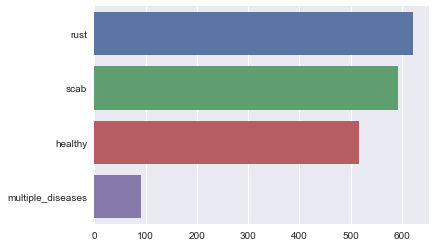

In [13]:
sns.barplot(x= train_df['class'].value_counts().values,y= train_df['class'].value_counts().index)
plt.show()

## SAMPLE IMAGES FROM EACH CLASS

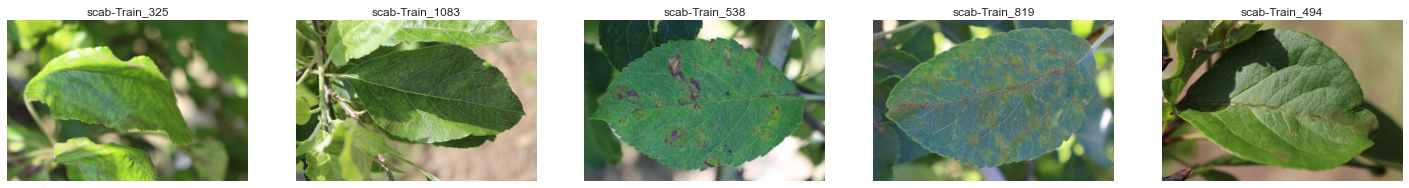

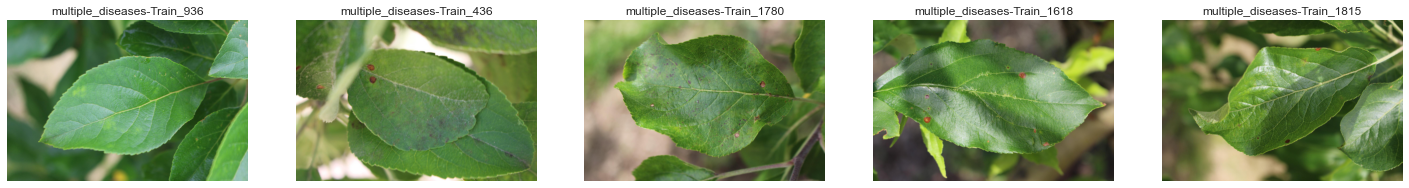

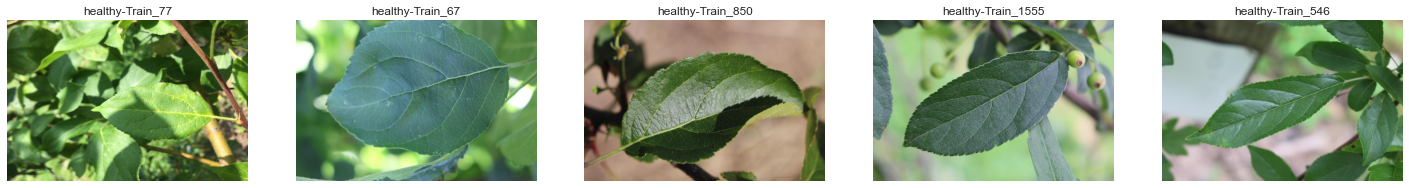

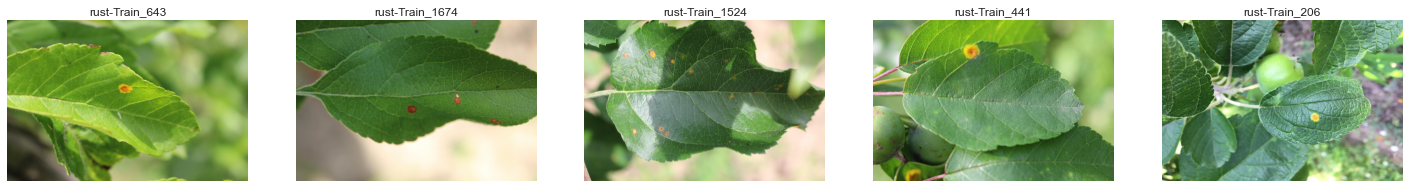

In [24]:
np.random.seed(32)
for class_name in train_df['class'].unique():
    idxs = np.random.choice(train_df[train_df['class'] == class_name]['image_id'],size=5,replace=False)
    plt.figure(figsize=(25,5))
    for i,image_name in enumerate(idxs):
        plt.subplot(1,5,i+1)
        img = plt.imread(os.path.join('images/',image_name+'.jpg'))
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name+'-'+image_name)
    plt.show()